In [1]:
from Utils import get_paths,get_inter_pos_frames
import sklearn
import numpy as np
import copy
file_name = get_paths('Data/')[:2]
file_name2 = get_paths('Data/')[3:5]

In [2]:
get_paths('Data/')

['Data/151507_preprocessed.h5',
 'Data/151508_preprocessed.h5',
 'Data/151509_preprocessed.h5',
 'Data/151510_preprocessed.h5',
 'Data/151669_preprocessed.h5',
 'Data/151670_preprocessed.h5',
 'Data/151671_preprocessed.h5',
 'Data/151672_preprocessed.h5',
 'Data/151673_preprocessed.h5',
 'Data/151674_preprocessed.h5',
 'Data/151675_preprocessed.h5',
 'Data/151676_preprocessed.h5']

In [3]:
slice1,slice2 = get_inter_pos_frames(file_name[0],file_name[1])
slice3,slice4 = get_inter_pos_frames(file_name2[0],file_name2[1],threhold=0.1)

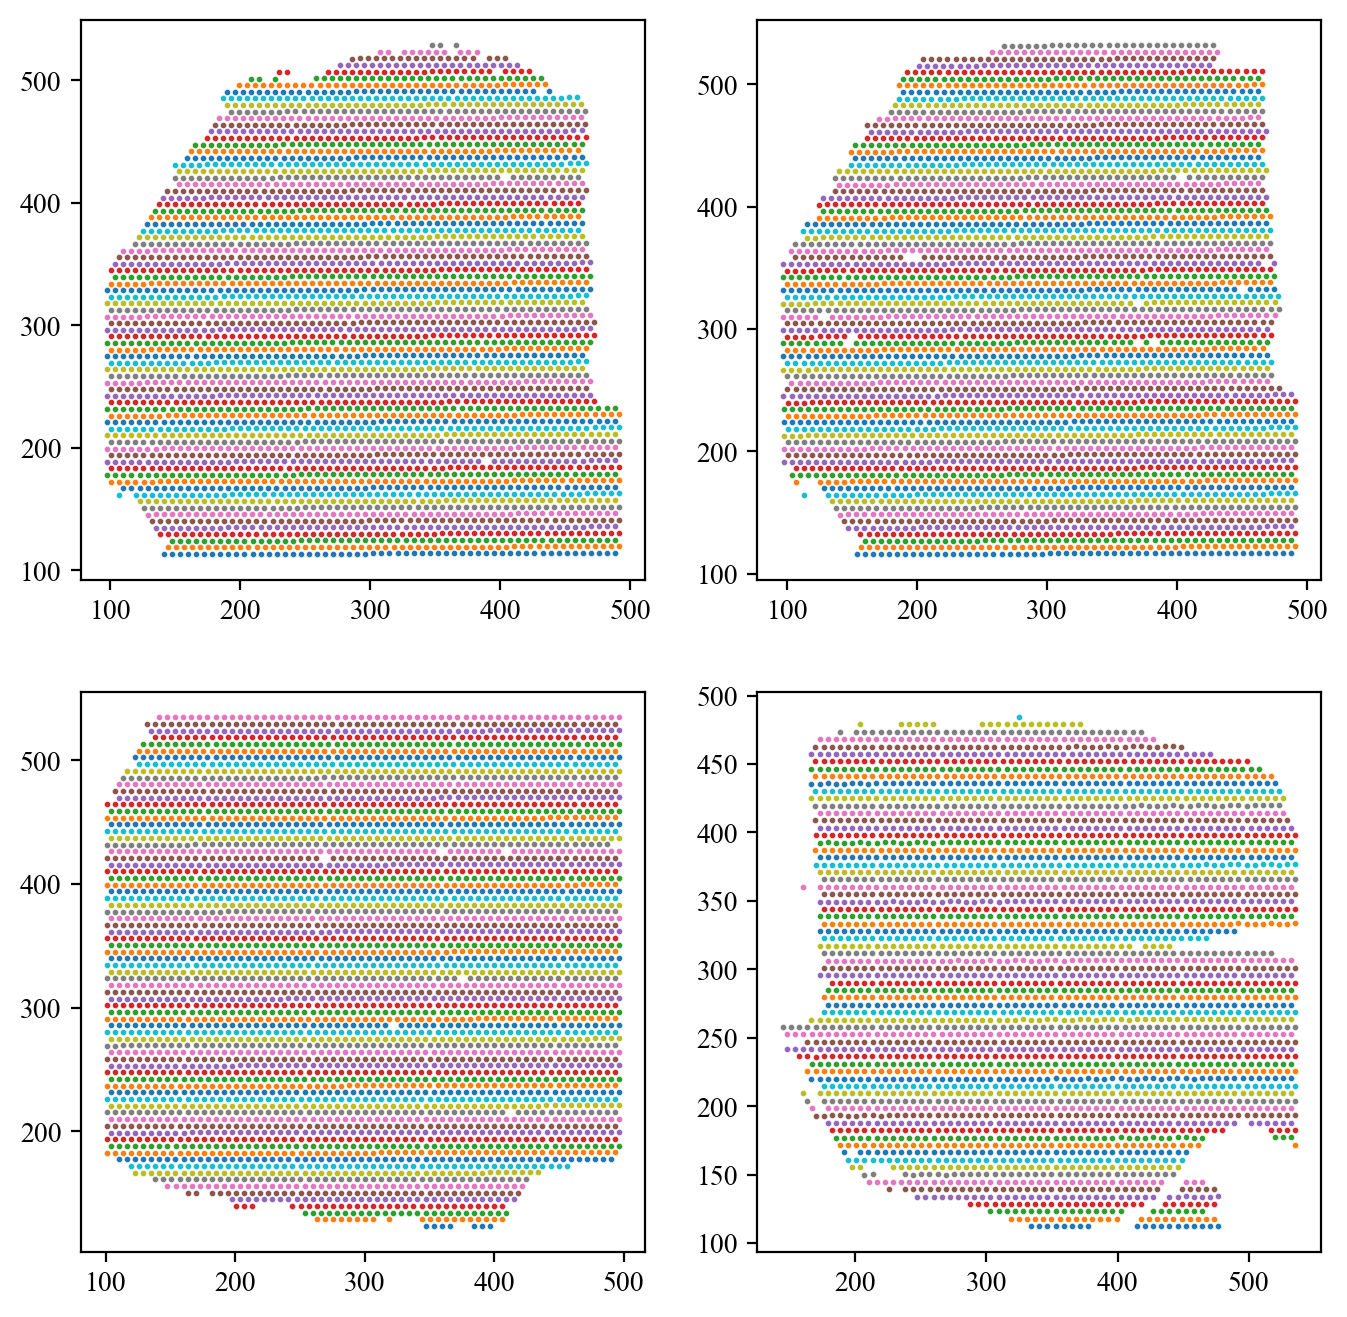

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
slice1.keys()
fig,ax = plt.subplots(2,2,dpi=200,figsize=(8,8))
for line in slice1['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[0][0])
for line in slice2['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[0][1])
for line in slice3['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[1][0])
for line in slice4['Position']:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=5,ax=ax[1][1])

In [5]:
len(slice1['Position']),len(slice2['Position'])
slice1_pos = slice1['Position']
slice2_pos = slice2['Position']
scale_max=[min(np.max(slice1['Position'][i][:,0]),np.max(slice2['Position'][i][:,0])) for i in range(len(slice1['Position']))]
scale_min=[max(np.min(slice1['Position'][i][:,0]),np.min(slice2['Position'][i][:,0])) for i in range(len(slice1['Position']))]
scale = list(zip(scale_min,scale_max))
scale

[(153.375342816, 487.938810684),
 (156.435648952, 490.99911682),
 (159.54095959, 487.893806182),
 (156.39064445, 490.99911682),
 (147.074712536, 487.84880168),
 (143.969401898, 490.954112318),
 (140.86409126, 487.84880168),
 (137.758780622, 490.909107816),
 (134.653469984, 487.803797178),
 (112.916295518, 490.864103314),
 (128.397844206, 487.758792676),
 (106.705674242, 490.819098812),
 (103.600363604, 487.713788174),
 (106.66066974, 490.819098812),
 (97.614764838, 487.668783672),
 (100.720075476, 490.77409431),
 (97.614764838, 487.668783672),
 (100.675070974, 490.729089808),
 (97.569760336, 487.62377917),
 (100.675070974, 490.684085306),
 (97.524755834, 487.578774668),
 (100.630066472, 490.684085306),
 (97.524755834, 487.533770166),
 (100.58506197, 472.367252992),
 (97.479751332, 469.261942354),
 (100.540057468, 466.111627214),
 (103.330336592, 468.901906338),
 (100.540057468, 466.111627214),
 (97.43474683, 463.006316576),
 (100.495052966, 466.066622712),
 (97.389742328, 462.961312074

In [6]:
slice1_pos = copy.deepcopy(slice1['Position'])
slice2_pos = copy.deepcopy(slice2['Position'])
values = [slice1_pos[0][i] for i in range(len(slice1_pos[0])) if scale[0][0]<= slice1_pos[0][i][0] <= scale[0][1]]
cutted_pos1 = []
cutted_pos2 = []
for n in range(len(slice1_pos)):
    cutted_pos1.append(np.array([slice1_pos[n][i] for i in range(len(slice1_pos[n])) if scale[n][0]<= slice1_pos[n][i][0] <= scale[n][1]]))
for n in range(len(slice2_pos)):
    cutted_pos2.append(np.array([slice2_pos[n][i] for i in range(len(slice2_pos[n])) if scale[n][0]<= slice2_pos[n][i][0] <= scale[n][1]]))


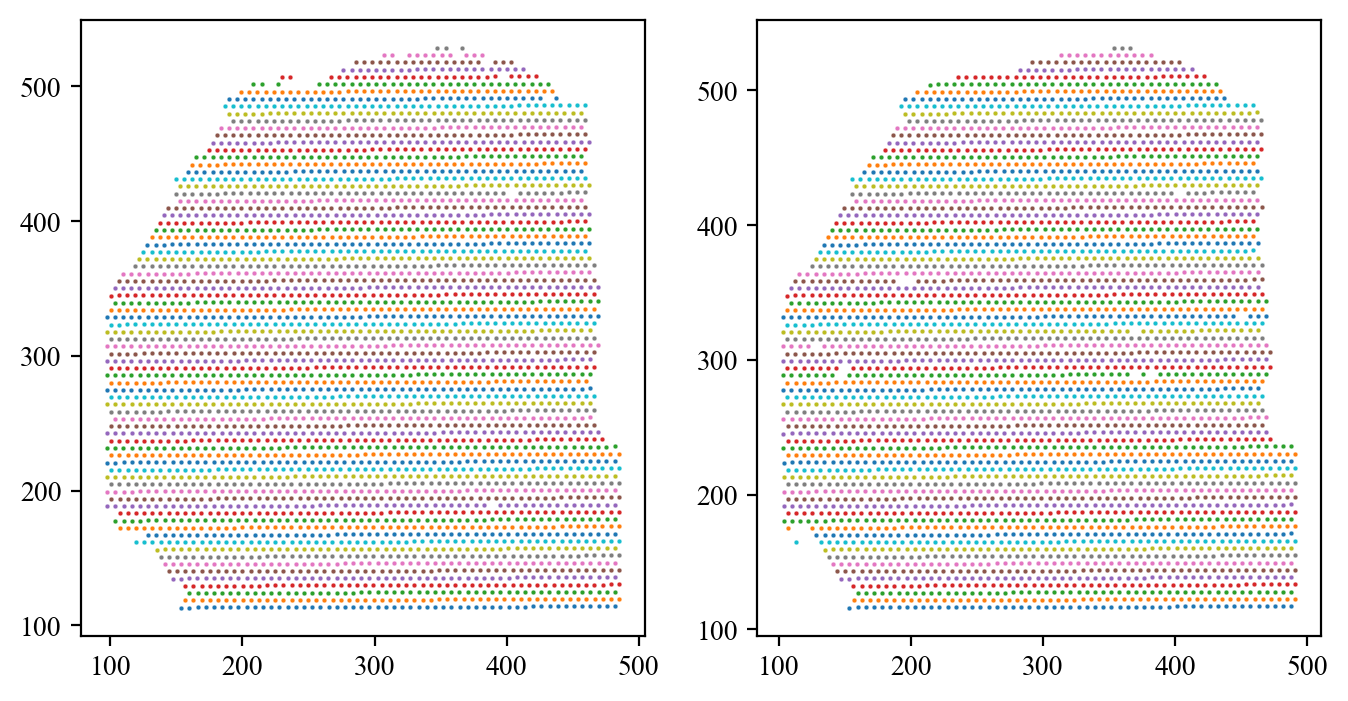

In [7]:
fig,ax = plt.subplots(1,2,dpi=200,figsize=(8,4))
for line in cutted_pos1:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=3,ax=ax[0])
for line in cutted_pos2:
    sns.scatterplot(x=line[:,0],y=line[:,1],s=3,ax=ax[1])   

In [8]:
for i in range(len(cutted_pos1)):
    inter = min(len(cutted_pos1[i]),len(cutted_pos2[i]))
    print(np.allclose(cutted_pos1[i][:inter],cutted_pos2[i][:inter],0.3))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


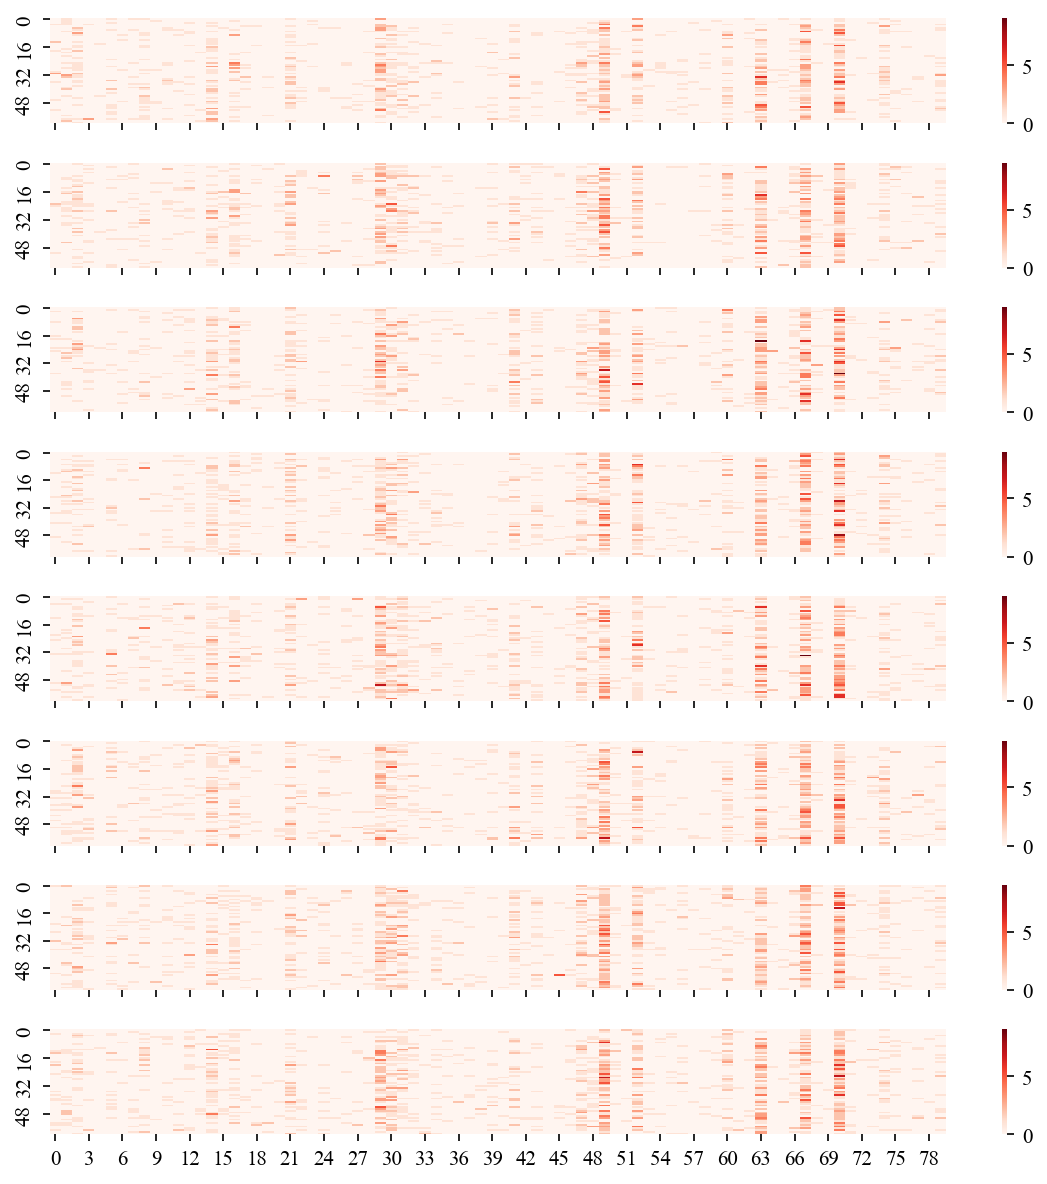

In [9]:

fig,ax = plt.subplots(8,1,dpi=150,figsize=[8,8],sharex=True)
for i in range(len(ax)):
    ax[i].set_xticks([])
    sns.heatmap(slice1['Gene_features'][i+30][:,:80],cmap='Reds',ax=ax[i],vmin=0,vmax=9)
plt.tight_layout()


In [10]:
sample_size=50
x, y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
# 定义扭曲函数
def nonlinear_transformation(x, y):
    x_new = x ** 2 + y ** 2
    y_new = x * y
    return x_new, y_new

# 对网格进行扭曲
x_new, y_new = nonlinear_transformation(x, y)


In [11]:
x

array([[  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       ...,
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ],
       [  0.        ,   1.01010101,   2.02020202, ...,  97.97979798,
         98.98989899, 100.        ]])

<Axes: >

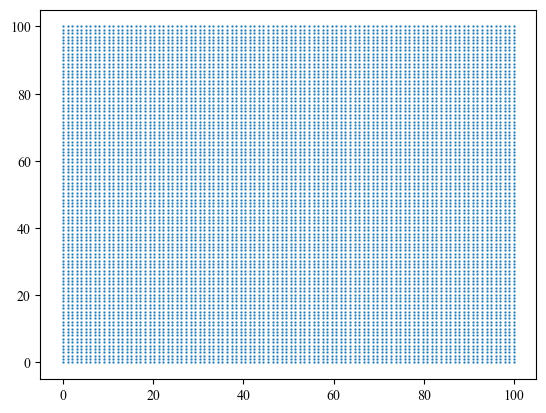

In [12]:
sns.scatterplot(x=np.squeeze(np.reshape(x,-1)),y=np.squeeze(np.reshape(y,-1)),s=3)

<Axes: >

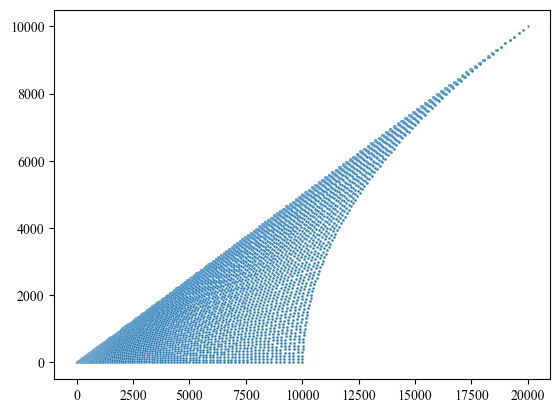

In [13]:
sns.scatterplot(x=np.squeeze(np.reshape(x_new,-1)),y=np.squeeze(np.reshape(y_new,-1)),s=3)

In [14]:
x, y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
x_ = copy.deepcopy(x)
y_ = copy.deepcopy(y)
x_ += np.random.normal(0, 0.01, size=x.shape)
y_ += np.random.normal(0, 0.01, size=y.shape)
flatten = lambda x:x.reshape(-1)


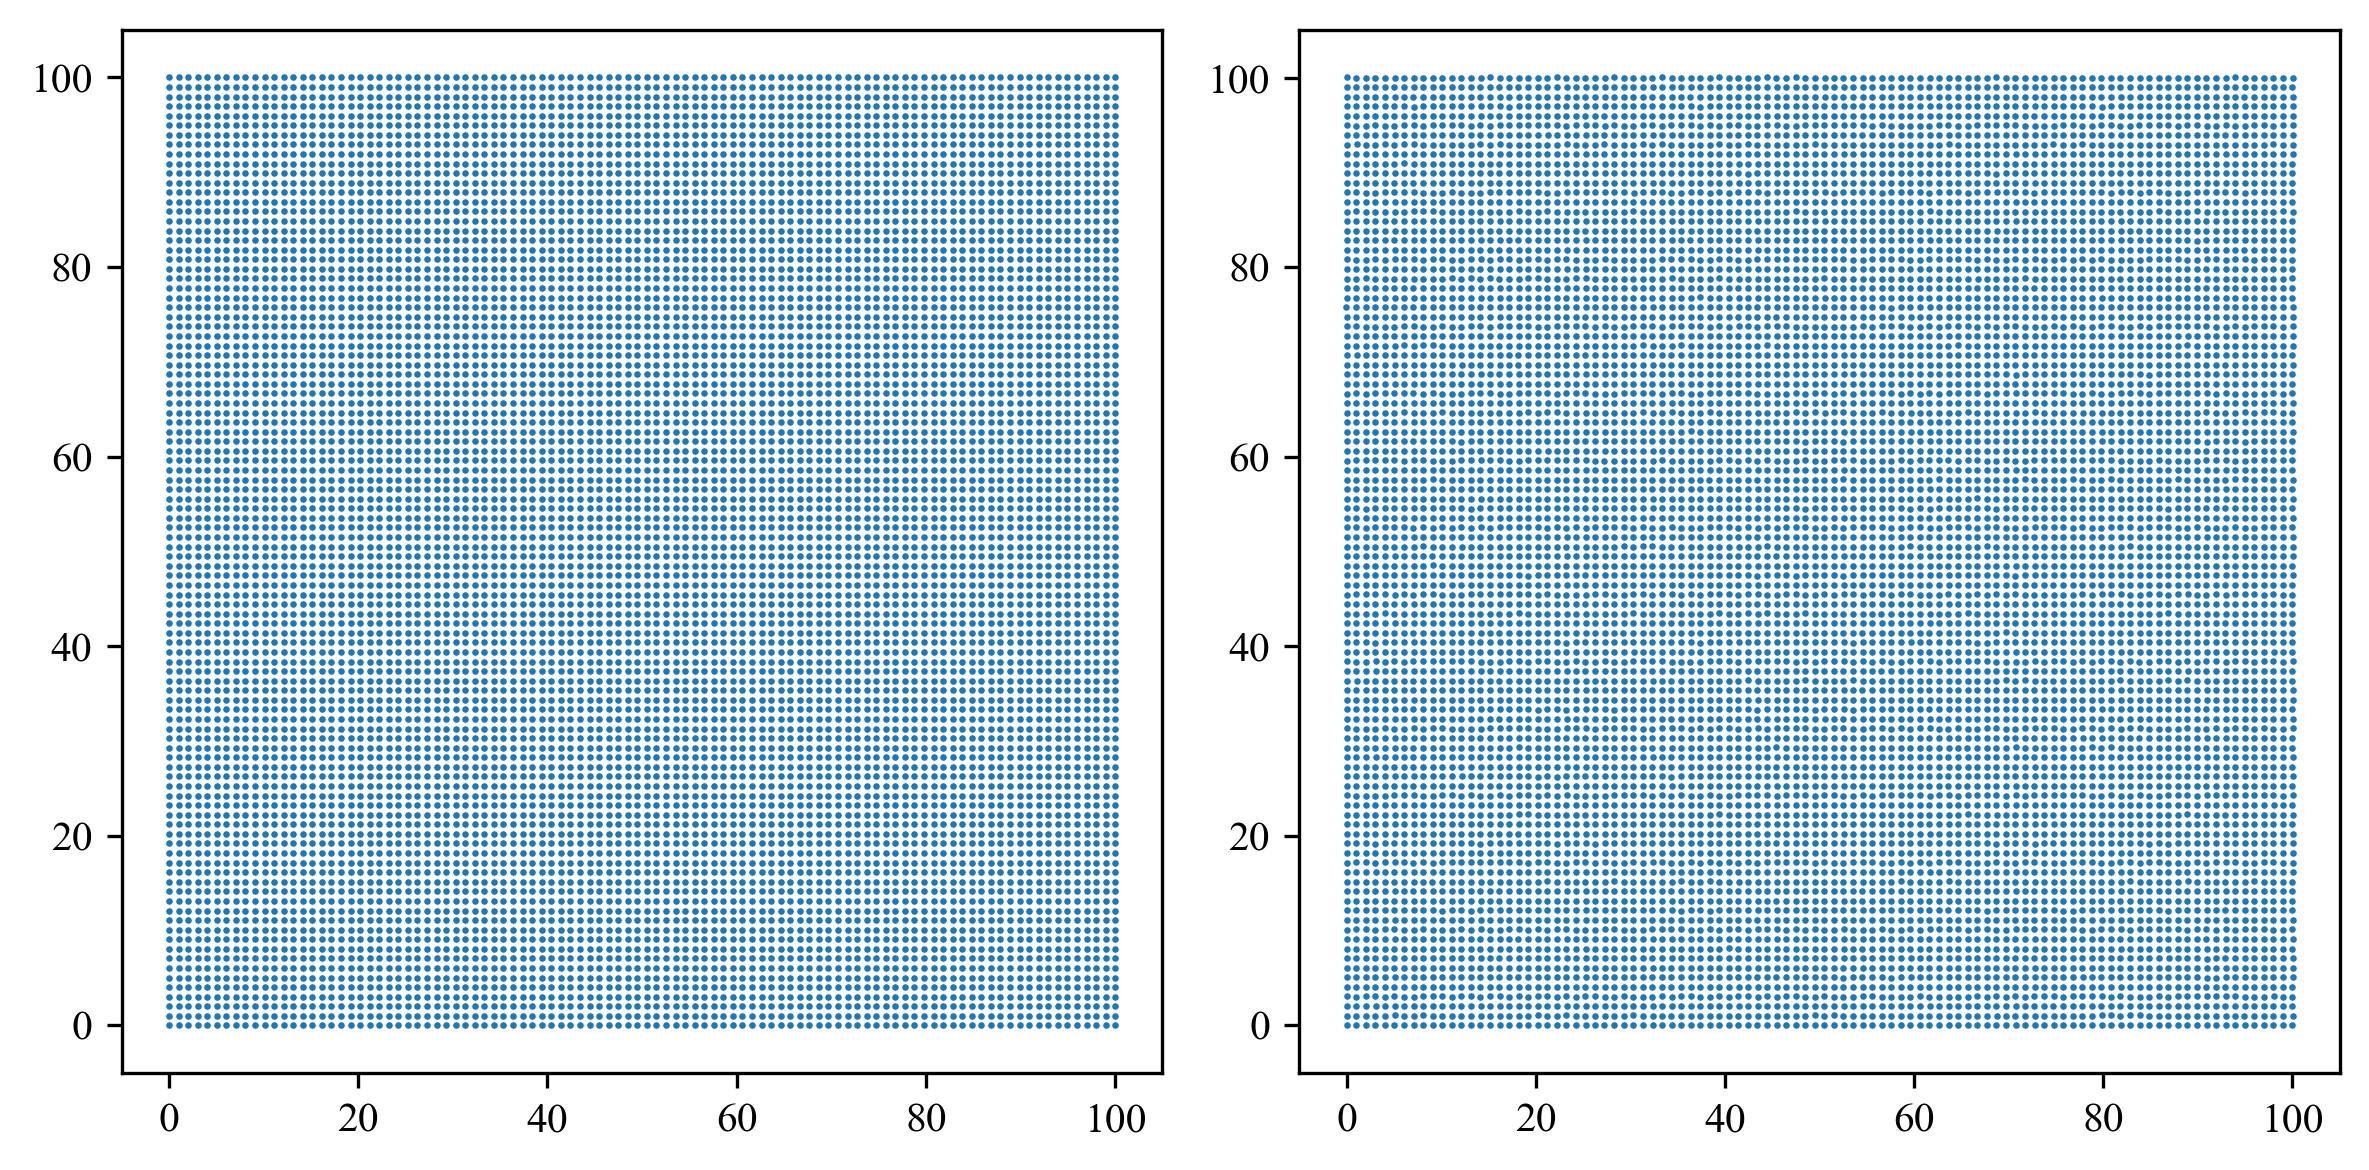

In [15]:
fig,ax = plt.subplots(1,2,dpi=300,figsize=[8,4])
sns.scatterplot(x=flatten(x),y=flatten(y),s=3,ax=ax[0])
sns.scatterplot(x=flatten(x_),y=flatten(y_),s=3,ax=ax[1])
plt.tight_layout()

In [20]:
slice1_pos[0] += np.random.uniform(-0.01, 0.01, size=slice1_pos[0].shape)